<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/DataScience_Topics/Tranfer_Learning_practice/Tranfer_learning_fine_tuning(without_data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#  Data_set li
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [33]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/DeepLearn-TopicsTheory-lab/Project/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [34]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten  
from keras.applications.vgg16 import VGG16

In [35]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False ,
                 input_shape=(150,150,3) 
                 )

In [36]:
conv_base.trainable = True  # this is unfreeze the convo. base layer
set_trainable = False
for layer in conv_base.layers:
  if layer.name =='block5_conv1':
    set_trainable = True 
  if set_trainable :
    layer.trainable = True
  else:
    layer.trainable = False 

for layer in conv_base.layers:
  print(layer.name, layer.trainable)

conv_base.summary()

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                            

In [37]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [39]:
#  This without augmentation so do this : 
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
 )
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [40]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [41]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [42]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 101ms/step - loss: 0.2388 - accuracy: 0.8978 - val_loss: 0.1590 - val_accuracy: 0.9342
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.1316 - accuracy: 0.9493 - val_loss: 0.1339 - val_accuracy: 0.9488
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.0931 - accuracy: 0.9657 - val_loss: 0.1240 - val_accuracy: 0.9536
Epoch 4/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0661 - accuracy: 0.9765 - val_loss: 0.1281 - val_accuracy: 0.9496
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.1216 - val_accuracy: 0.9558
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.1243 - val_accuracy: 0.9562
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.0192 - accuracy: 0.9955 - val_loss: 0.1322 - val_acc

It gives very good accuracy. 

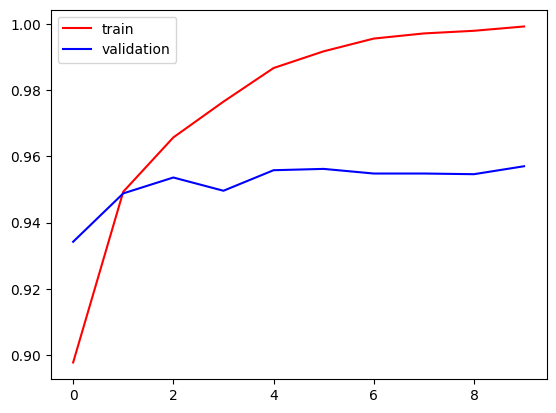

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

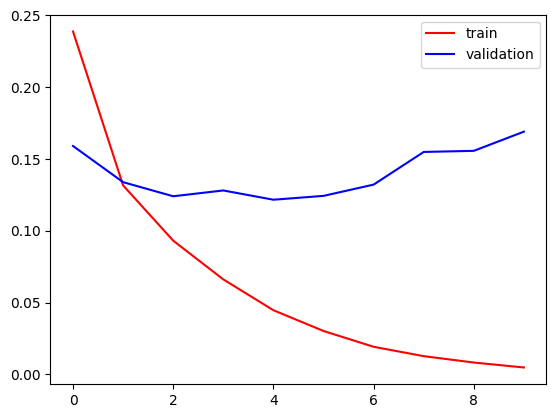

In [46]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Here Overfitting is happen.